# 7. Strong Law of Large Numbers

**Goal:** Demonstrate almost sure convergence of sample means.

- **WLLN:** $\bar{X}_n \xrightarrow{P} \mu$
- **SLLN:** $\bar{X}_n \xrightarrow{a.s.} \mu$ — every path converges.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

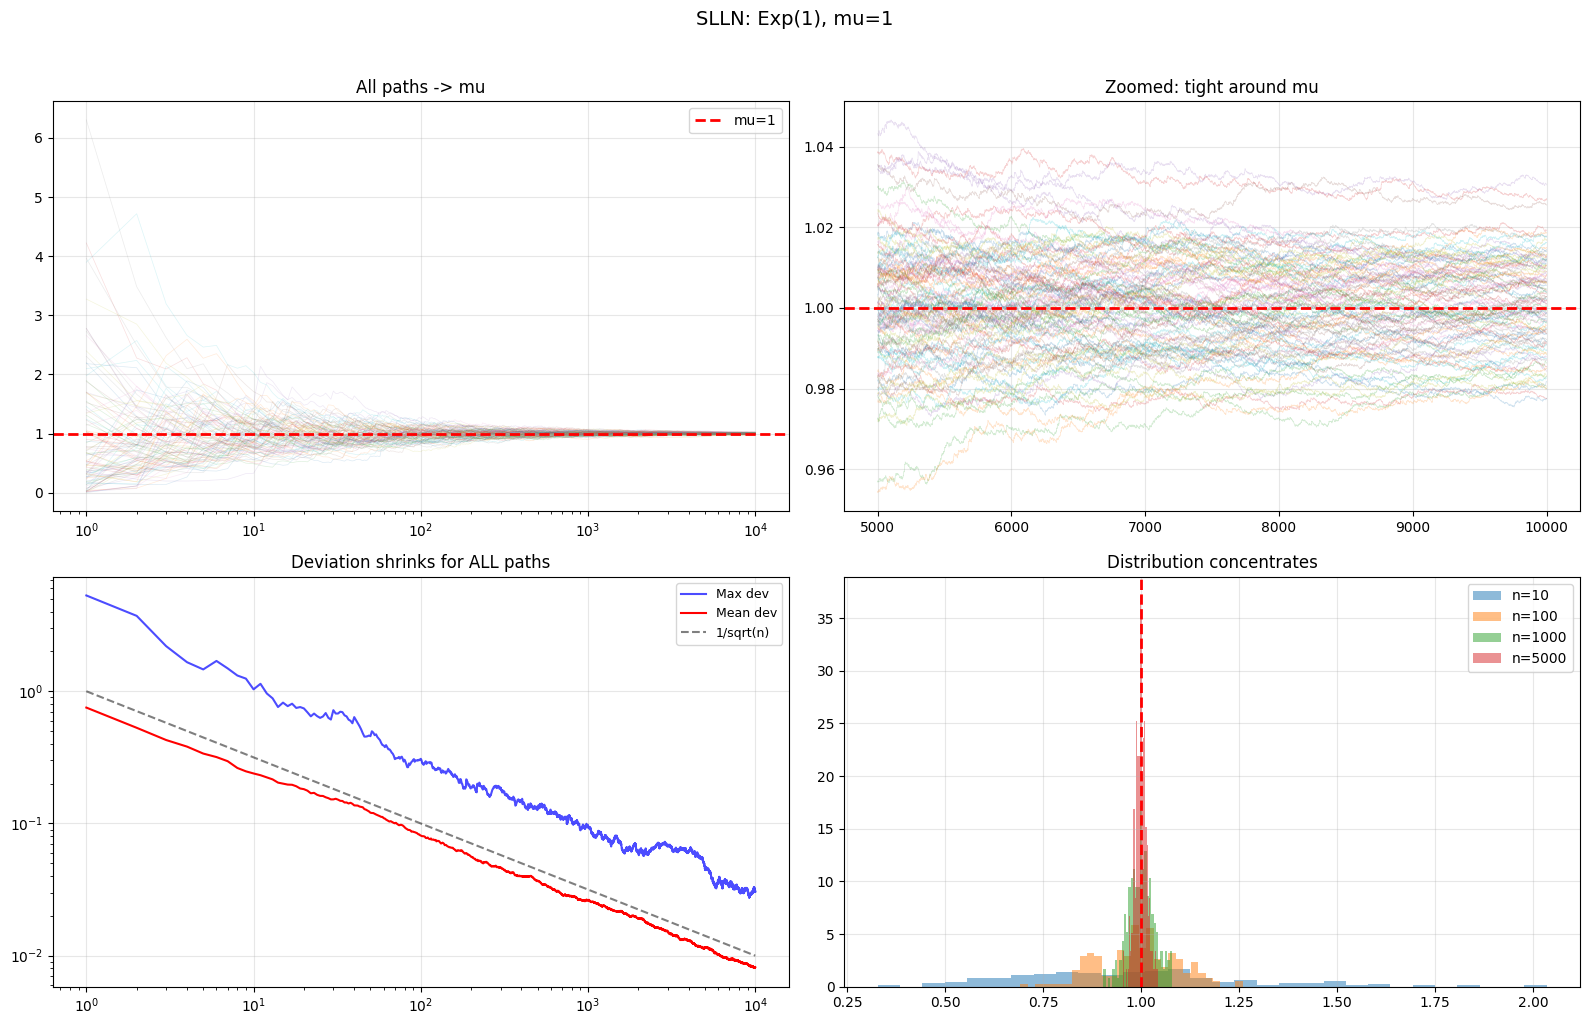

In [2]:
np.random.seed(42)
N, n_paths = 10000, 200
samples = np.random.exponential(1.0, (n_paths, N))
ns = np.arange(1, N+1)
means = np.cumsum(samples, axis=1) / ns

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
ax = axes[0,0]
for i in range(100): ax.plot(ns, means[i], alpha=0.15, linewidth=0.5)
ax.axhline(1, color='red', linewidth=2, linestyle='--', label='mu=1')
ax.set_xscale('log'); ax.set_title('All paths -> mu', fontsize=12)
ax.legend(); ax.grid(True, alpha=0.3)

ax = axes[0,1]
for i in range(100): ax.plot(ns[5000:], means[i,5000:], alpha=0.2, linewidth=0.5)
ax.axhline(1, color='red', linewidth=2, linestyle='--')
ax.set_title('Zoomed: tight around mu', fontsize=12); ax.grid(True, alpha=0.3)

ax = axes[1,0]
ax.plot(ns, np.max(np.abs(means-1), axis=0), 'b-', alpha=0.7, label='Max dev')
ax.plot(ns, np.mean(np.abs(means-1), axis=0), 'r-', label='Mean dev')
ax.plot(ns, 1/np.sqrt(ns), 'k--', alpha=0.5, label='1/sqrt(n)')
ax.set_xscale('log'); ax.set_yscale('log')
ax.set_title('Deviation shrinks for ALL paths', fontsize=12)
ax.legend(fontsize=9); ax.grid(True, alpha=0.3)

ax = axes[1,1]
for nc in [10, 100, 1000, 5000]:
    ax.hist(means[:,nc-1], bins=30, alpha=0.5, density=True, label=f'n={nc}')
ax.axvline(1, color='red', linewidth=2, linestyle='--')
ax.set_title('Distribution concentrates', fontsize=12)
ax.legend(); ax.grid(True, alpha=0.3)
plt.suptitle('SLLN: Exp(1), mu=1', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

## Multiple Distributions

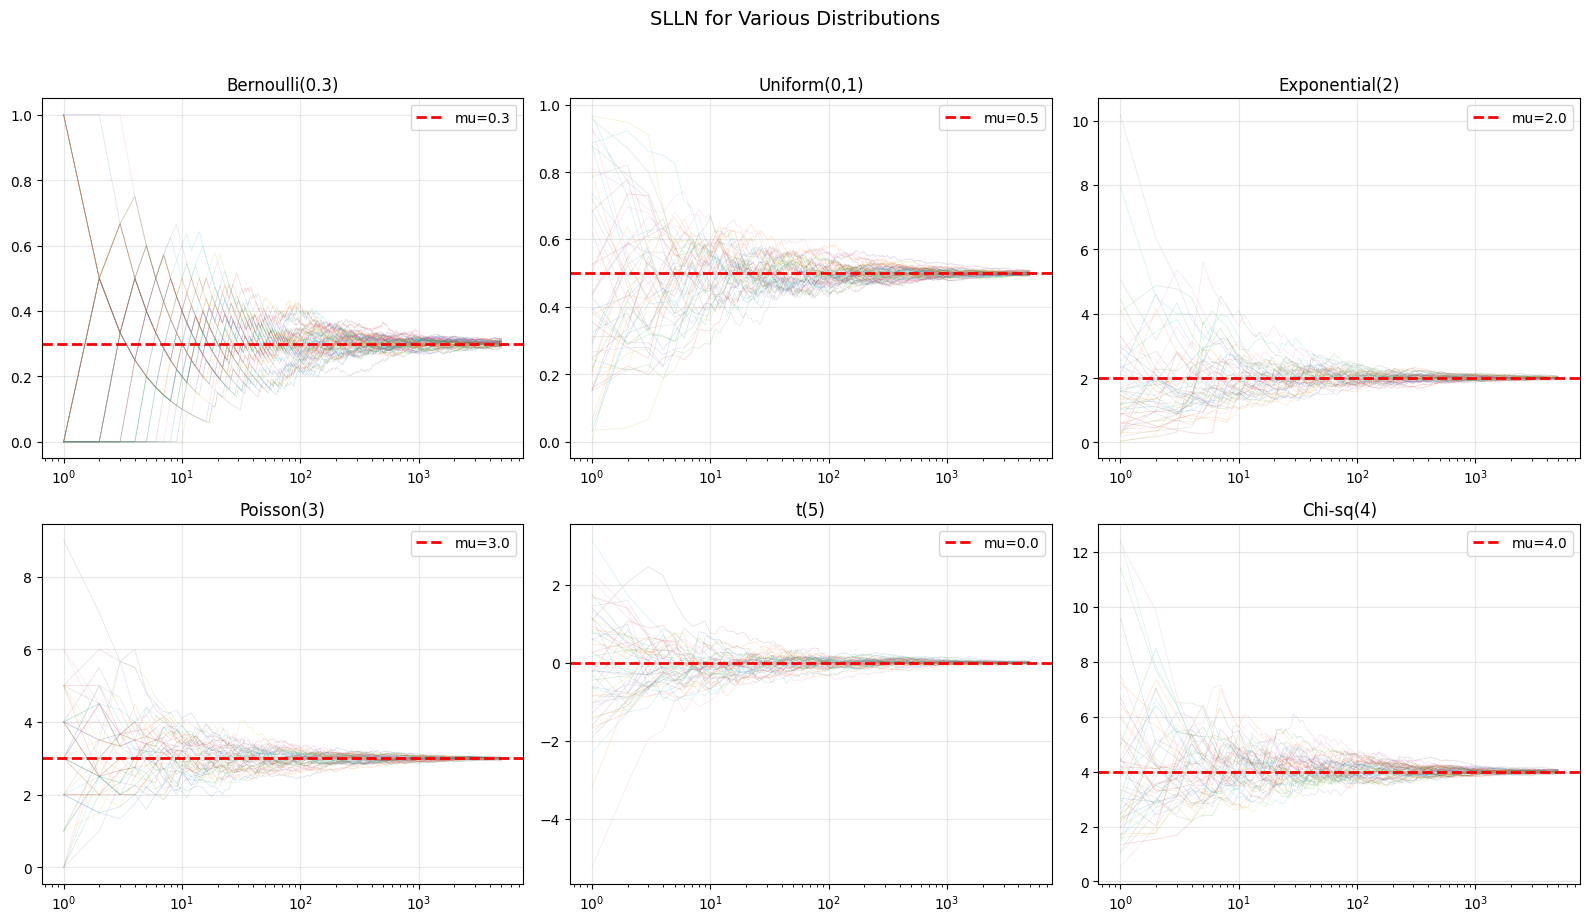

In [3]:
np.random.seed(123)
N, n_paths = 5000, 100
ns = np.arange(1, N+1)
dists = [
    ('Bernoulli(0.3)', lambda s: np.random.binomial(1,0.3,s), 0.3),
    ('Uniform(0,1)', lambda s: np.random.uniform(0,1,s), 0.5),
    ('Exponential(2)', lambda s: np.random.exponential(2,s), 2.0),
    ('Poisson(3)', lambda s: np.random.poisson(3,s), 3.0),
    ('t(5)', lambda s: stats.t.rvs(5,size=s), 0.0),
    ('Chi-sq(4)', lambda s: np.random.chisquare(4,s), 4.0),
]
fig, axes = plt.subplots(2, 3, figsize=(16, 9))
for idx,(name,sampler,mu) in enumerate(dists):
    ax = axes[idx//3][idx%3]
    m = np.cumsum(sampler((n_paths,N)), axis=1)/ns
    for i in range(50): ax.plot(ns, m[i], alpha=0.2, linewidth=0.5)
    ax.axhline(mu, color='red', linewidth=2, linestyle='--', label=f'mu={mu}')
    ax.set_title(name); ax.set_xscale('log'); ax.legend(); ax.grid(True, alpha=0.3)
plt.suptitle('SLLN for Various Distributions', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

## Cauchy: SLLN Fails (No Finite Mean)

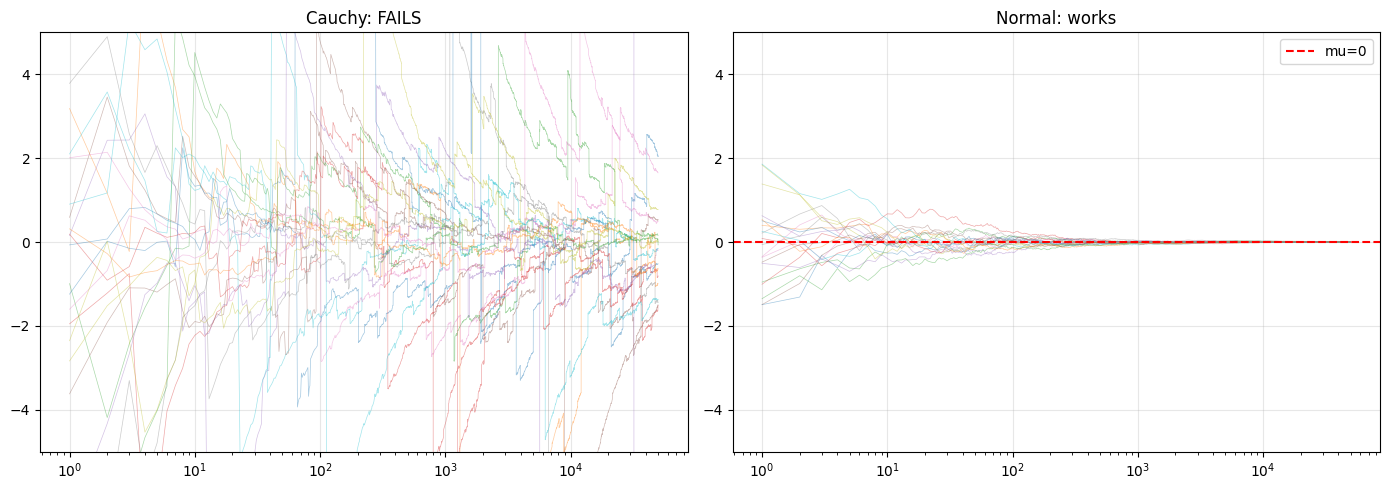

In [4]:
np.random.seed(99)
N, n_paths = 50000, 20
ns = np.arange(1, N+1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
mc = np.cumsum(np.random.standard_cauchy((n_paths,N)), axis=1)/ns
for i in range(n_paths): ax1.plot(ns, mc[i], alpha=0.4, linewidth=0.5)
ax1.set_title('Cauchy: FAILS'); ax1.set_xscale('log'); ax1.set_ylim(-5,5); ax1.grid(True, alpha=0.3)
mn = np.cumsum(np.random.normal(0,1,(n_paths,N)), axis=1)/ns
for i in range(n_paths): ax2.plot(ns, mn[i], alpha=0.4, linewidth=0.5)
ax2.axhline(0, color='red', linestyle='--', label='mu=0')
ax2.set_title('Normal: works'); ax2.set_xscale('log'); ax2.set_ylim(-5,5); ax2.legend(); ax2.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Key Takeaways

1. **SLLN** gives a.s. convergence — every path converges.
2. Works for any distribution with finite mean.
3. **Cauchy** (no mean) shows failure.
4. Foundation of statistics.